In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('customer_churn_dataset.csv')

In [19]:

df.head()


,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,22,25,14,4,27,598,9,1,False,False,False,True,False
1,41,28,28,7,13,584,20,0,False,False,True,True,False
2,47,27,10,2,29,757,21,0,True,True,False,False,False
3,35,9,12,5,17,232,18,0,True,True,False,False,True
4,53,58,24,9,2,533,18,0,False,False,True,False,False


In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
target_col = [col for col in df.columns if 'purchase' in col.lower() or 'churn' in col.lower() or 'y' == col.lower()]
if not target_col:
    raise ValueError("Couldn't find target column. Please check column names.")
target = target_col[0]

In [10]:
X = df.drop(target, axis=1)
y = df[target]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9573344379433543

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     10134
           1       0.96      0.95      0.95      9179

    accuracy                           0.96     19313
   macro avg       0.96      0.96      0.96     19313
weighted avg       0.96      0.96      0.96     19313



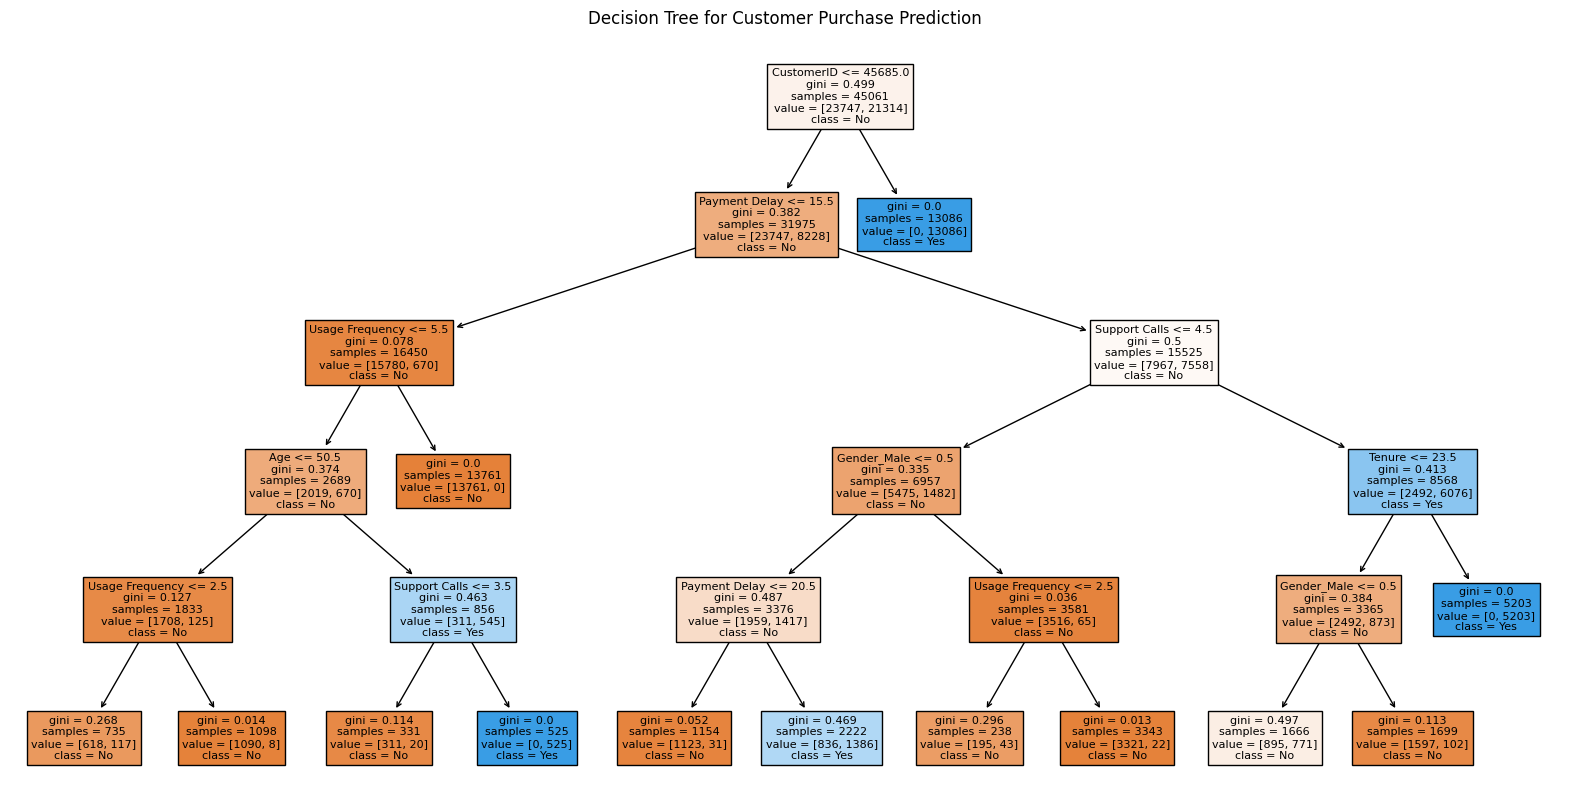

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree for Customer Purchase Prediction")
plt.show()